In [20]:
df = pd.read_csv("student-mat.csv", sep=';')

In [21]:
sns.set(style="whitegrid")

In [22]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
students = pd.DataFrame([
    [3, 0, 2, 14, 15],  # Student 1
    [1, 2, 10, 8, 10]   # Student 2
], columns=['studytime', 'failures', 'absences', 'G1', 'G2'])

predicted_grades = model.predict(students)
print("Predicted Grades:", predicted_grades)

Predicted Grades: [14.96020255  8.74014034]


In [27]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7821754247320556
Mean Squared Error: 4.466503212015605


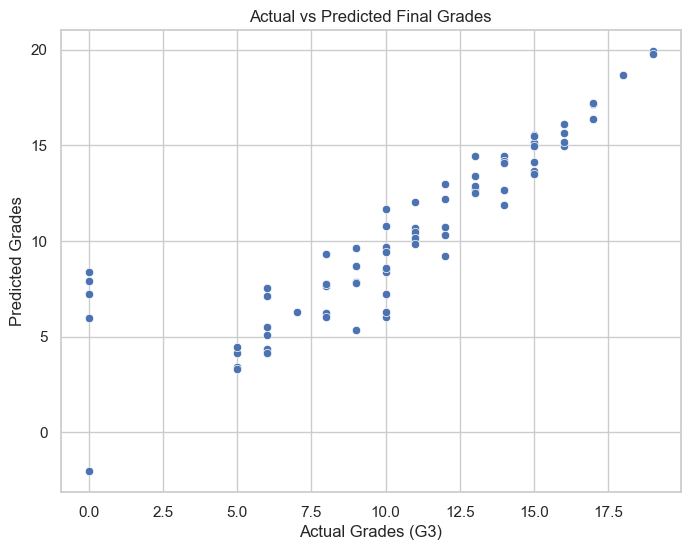

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Final Grades")
plt.show()

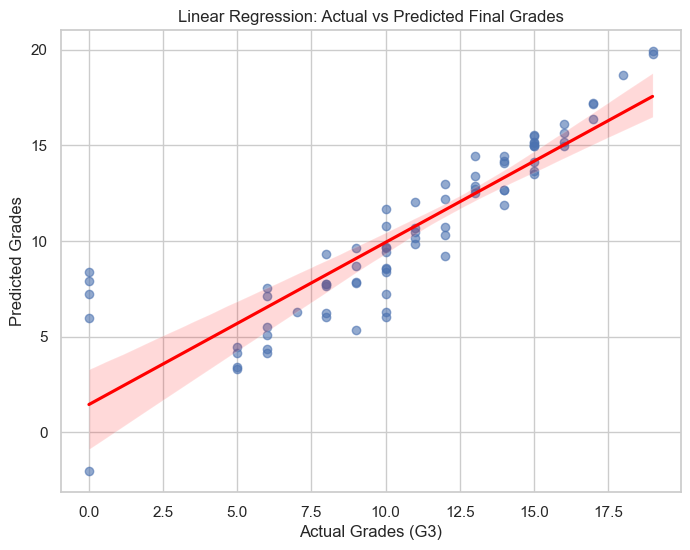

In [29]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades")
plt.title("Linear Regression: Actual vs Predicted Final Grades")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [34]:
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest R² Score:", rf_r2)
print("Random Forest MSE:", rf_mse)


Random Forest R² Score: 0.8725239455080609
Random Forest MSE: 2.61390252290377


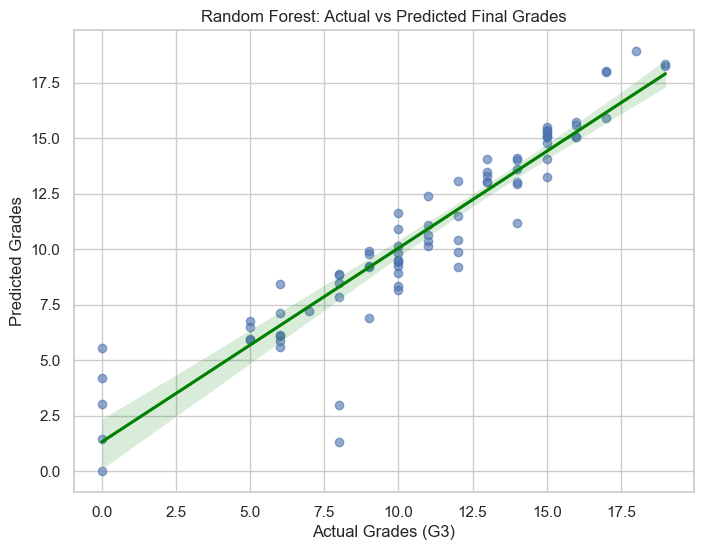

In [35]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=rf_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades")
plt.title("Random Forest: Actual vs Predicted Final Grades")
plt.show()

In [37]:
students = pd.DataFrame([
    [3, 0, 2, 14, 15],  # Student 1
    [1, 2, 10, 8, 10]   # Student 2
], columns=['studytime', 'failures', 'absences', 'G1', 'G2'])

predicted_grades = rf_model.predict(students)
print("Predicted Grades:", predicted_grades)

Predicted Grades: [15.674  9.815]
